<a href="https://colab.research.google.com/github/ChandanCharchit/Computer_Vision_Project/blob/main/Fire_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import PIL

import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import os
import matplotlib.image as mpimg
%matplotlib inline
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

In [2]:
train_path='/content/drive/MyDrive/Datasets/Fire data/Train'
val_path='/content/drive/MyDrive/Datasets/Fire data/Vali'
test_path='/content/drive/MyDrive/Datasets/Fire data/Test'

In [3]:
!nvidia-smi

Fri Apr  2 03:37:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
training_datagen=ImageDataGenerator(rescale=1./255)

validation_datagen=ImageDataGenerator(rescale=1./255)

training_data=training_datagen.flow_from_directory(train_path,
                                                   target_size=(227,227),
                                                   class_mode='categorical',
                                                   batch_size=32)

valid_data=training_datagen.flow_from_directory(val_path,
                                                   target_size=(227,227),
                                                   class_mode='categorical',
                                                   batch_size=32)

Found 6004 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


**Model**

In [5]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
                                  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                  tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                  tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(4096, activation='relu'),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Dense(2048, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(2, activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3456)              0

In [6]:
history=model.fit(training_data,
          steps_per_epoch=15,
          validation_data = valid_data,
          validation_steps=15,
          epochs = 50)


Epoch 1/50
15/15 [==============================] - 307s 19s/step - loss: 1.5795 - acc: 0.5006 - val_loss: 0.7001 - val_acc: 0.5021
Epoch 2/50
15/15 [==============================] - 220s 15s/step - loss: 0.6964 - acc: 0.5148 - val_loss: 0.7384 - val_acc: 0.5167
Epoch 3/50
15/15 [==============================] - 188s 13s/step - loss: 0.6687 - acc: 0.5809 - val_loss: 0.7183 - val_acc: 0.4583
Epoch 4/50
15/15 [==============================] - 151s 10s/step - loss: 0.6766 - acc: 0.5628 - val_loss: 0.7203 - val_acc: 0.4938
Epoch 5/50
15/15 [==============================] - 139s 10s/step - loss: 0.6407 - acc: 0.6327 - val_loss: 0.7297 - val_acc: 0.4458
Epoch 6/50
15/15 [==============================] - 103s 7s/step - loss: 0.6261 - acc: 0.6439 - val_loss: 1.0116 - val_acc: 0.4875
Epoch 7/50
15/15 [==============================] - 100s 7s/step - loss: 0.5860 - acc: 0.6624 - val_loss: 0.6651 - val_acc: 0.6250
Epoch 8/50
15/15 [==============================] - 84s 6s/step - loss: 0.5922

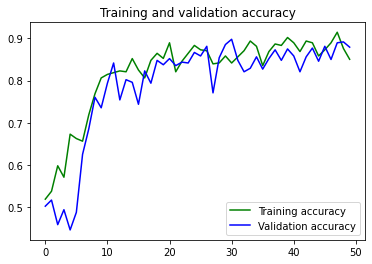

<Figure size 432x288 with 0 Axes>

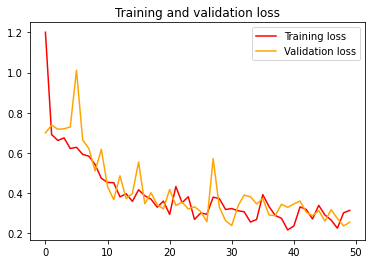

<Figure size 432x288 with 0 Axes>

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()